In [3]:
import importlib
import solver as sol 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 
import odl

##Choice of $\lambda$ parameter

In [3]:
#Save results in a dictionary (computationally long) Gio

importlib.reload(sol)
sol_phantom = sol.CtSolver(n=256, type=sol.DataType.CT)
lams_ct = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
obs_dougl = {}
obs_steep = {}
    for lam in tqdm(lams_ct): 
        obs_dougl [lam]  {'dougl_sol': [], 'dougl_err':[]}
        obs_steep [lam] {'steep_sol': [], 'steep_err':[]}
        recon_dougl_ct, error_dougl_ct = sol_phantom.solve_douglas_rachford_pd(lam=lam, gamma=0.001, tau=1.0, niter=50, verbose=True)
        recon_steep_ct, error_steep_ct = sol_phantom.solve_stepest_decent(lam=lam, gamma=0.0001, maxiter=500, verbose=True)
        
        obs_dougl[lam]['dougl_sol'].append(recon_dougl_ct)     
        obs_dougl[lam]['dougl_err'].append(error_dougl_ct)
        
        obs_steep[lam]['steep_sol'].append(recon_steep_ct)     
        obs_steep[lam]['steep_err'].append(error_steep_ct)
        
np.save('lambdaCT_douglas.npy', obs_dougl)
np.save('lambdaCT_steepest.npy', obs_steep)

In [1]:
#Import again
import importlib
import solver as sol 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 
import odl

learning_rate:0.00010965632005369021
iter = 0


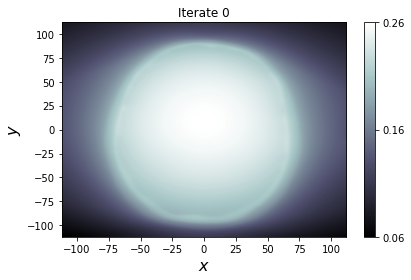

<Figure size 432x288 with 0 Axes>

iter = 10


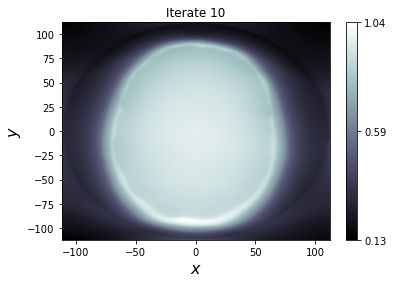

<Figure size 432x288 with 0 Axes>

iter = 20


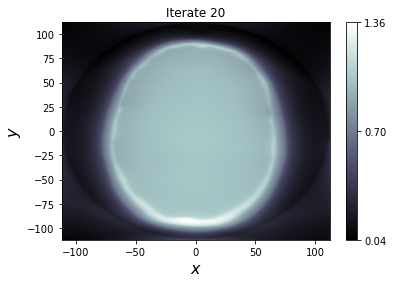

<Figure size 432x288 with 0 Axes>

In [ ]:
#Saving directly images and errors for different lambda Gio

importlib.reload(sol)
sol_phantom = sol.CtSolver(n=256, type=sol.DataType.CT)


#lams_ct = [1e-4, 
#           1e-3, 
#           1e-2, 
#           1e-1]

#outside for
#lam = 1e-4  # begin 13:50pm  -> end (died) - restart 14:33pm  -> end 15:14pm
#lam = 1e-3  # begin 15:15pm  -> end (died) - restart 15:20pm  -> end 15:53pm
#lam = 1e-2  # begin 15:55pm -> end (died) - restart 16:00pm   -> end 16:33pm
#lam = 1e-1   # begin 16:38pm -> end
lam = 1e-1 #200 iter 11:58am -> end (died) - restart 12:15pm

#for lam in tqdm(lams_ct): 

        #get the image and the errors
        #recon_dougl_ct, error_dougl_ct= sol_phantom.solve_douglas_rachford_pd(lam=lam, gamma=0.001, tau=1.0, niter=50, verbose=True)
recon_steep_ct, error_steep_ct = sol_phantom.solve_stepest_decent(lam=lam, gamma=1e-2, maxiter=200, verbose=True)
        
        
        #saving the image and the error
        
        #Douglas Rashford
        #np.save('3Drecon-dr['+str(lam)+'].npy',  recon_dougl_ct.asarray())
        #np.save('3Derr-dr['+str(lam)+'].npy', error_drpd_ct)
      
        #Steepest Descent
np.save('3D_recon-sd['+str(lam)+']200.npy', recon_steep_ct.asarray())
np.save('3D_err-sd['+str(lam)+']200.npy', error_steep_ct)

#From before Kenza
#recon_drpd_ct, error_drpd_ct = sol_phantom.solve_douglas_rachford_pd(lam=0.01, gamma=0.001, tau=1.0, niter=50, verbose=True)
#recon_drpd_ct, error_drpd_ct = sol_phantom.solve_stepest_decent(lam=0.001, gamma=0.0001, maxiter=500, verbose=True)

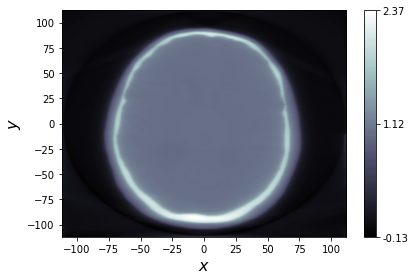

<Figure size 432x288 with 0 Axes>

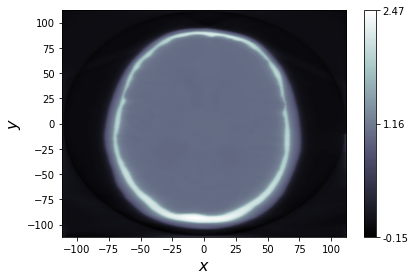

<Figure size 432x288 with 0 Axes>

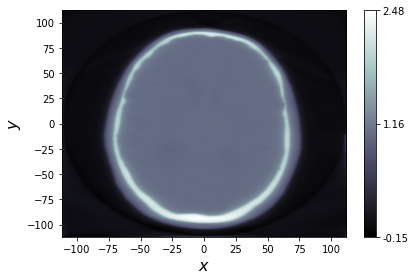

<Figure size 432x288 with 0 Axes>

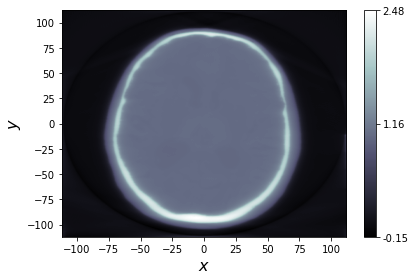

<Figure size 432x288 with 0 Axes>

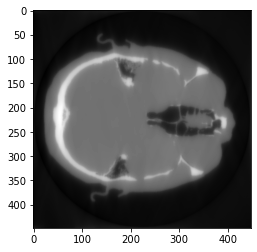

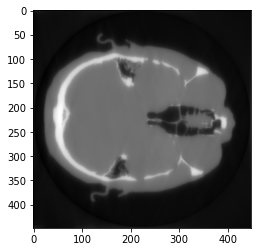

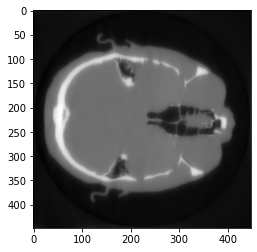

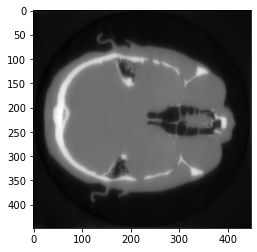

[  528.42775113   904.61244298  1174.22607836  1369.23097139
  1511.97487281  1618.06764818  1698.40195291  1760.57210694
  1809.86984467  1849.98071852  1883.47299694  1912.13792504
  1937.22675036  1959.61593314  1979.92263811  1998.58345537
  2015.90947048  2032.12562487  2047.39592036  2061.84206357
  2075.55658603  2088.61095802  2101.0621486   2112.95642353
  2124.33297062  2135.2244176   2145.66045743  2155.66646723
  2165.26627042  2174.48127357  2183.33115687  2191.83456476
  2200.00876059  2207.86979926  2215.43321779  2222.71317212
  2229.72330031  2236.4767225   2242.98552303  2249.26126835
  2255.31483436  2261.15692434  2266.79686051  2272.2441377
  2277.50790549  2282.59627765  2287.51719533  2292.27825439
  2296.88670545  2301.34910857  2305.67202383  2309.8614934
  2313.92338682  2317.86322837  2321.6860244   2325.39695394
  2329.00067807  2332.50168528  2335.90411876  2339.21212173
  2342.42931947  2345.55950994  2348.60631843  2351.57267972
  2354.46204646  2357.2771

In [13]:
#display the results with different lambdas Gio
importlib.reload(sol)
sol_phantom = sol.CtSolver(n=256, type=sol.DataType.CT)

#change the name of the file to show accordingly
recon1 = np.load('../3D_recon-sd[0.1].npy')
recon1 = sol_phantom.input_space.element(recon1)
recon2 = np.load('../3D_recon-sd[0.01].npy')
recon2 = sol_phantom.input_space.element(recon2)
recon3 = np.load('../3D_recon-sd[0.001].npy')
recon3 = sol_phantom.input_space.element(recon3)
recon4 = np.load('../3D_recon-sd[0.0001].npy')
recon4 = sol_phantom.input_space.element(recon4)




recon1.show()
recon2.show()
recon3.show()
recon4.show()

plt.imshow(recon1[:,:,110], cmap="gray")
#plt.imshow(recon1[125,:,:], cmap="gray")
#plt.imshow(recon1[:,125,:], cmap="gray")
plt.show()
plt.imshow(recon2[:,:,110], cmap="gray")
#plt.imshow(recon1[125,:,:], cmap="gray")
#plt.imshow(recon1[:,125,:], cmap="gray")
plt.show()
plt.imshow(recon3[:,:,110], cmap="gray")
#plt.imshow(recon1[125,:,:], cmap="gray")
#plt.imshow(recon1[:,125,:], cmap="gray")
plt.show()
plt.imshow(recon4[:,:,110], cmap="gray")
#plt.imshow(recon1[125,:,:], cmap="gray")
#plt.imshow(recon1[:,125,:], cmap="gray")
plt.show()

error = np.load('../3D_err-sd[0.1].npy')
print(error)
#print(type(error_steep_ct))
#print(type(recon_steep_ct))
print(type(recon))